# I. Perkenalan

Nama : Mukhlish Rasyidi

Batch : FTDS - RMT - 018

Dataset : h8dsft_P1G4_mukhlish_rasyidi.csv 

merupakan hasil query dari database credit-card-information, dataset phase1_ftds_018_rmt, project id ftds-hacktiv8-project.

Objective : 

Pada project ini objectivenya membuat model machine learning untuk melakukan customer segmentation dari Perusahaan Kartu Kredit dengan menggunakan algoritma clustering K-Means.  

Customer segmentation merupakan hal yang penting untuk menentukan strategi perusahaan, namun untuk menetukan hal ini harus ditentukan terlebih dahulu berdasarkan segmentasi apa yang ingin dibuat.  Pada project ini saya ingin membuat segmentasi berdasarkan perilaku konsumtif dengan membandingkan limit kartu kredit dengan jumlah pembelian. 

Dari hasil tersebut perusahaan bisa melakukan explorasi lebih dalam untuk kelompok limit rendah namun banyak pembelian, apakah pembayarannya normal atau tidak. untuk yang normal bisa ditawarkan penambahan limit agar bisa semakin banyak belanja. 

Sedangkan untuk kelompok limit besar namun pembeliannya sedikit, perusahaan bisa menawarkan promo barang berkualitas, mahal, dan bisa dengan installment. Dengan demikian diharapkan bisa membuat customernya terdorong untuk berbelanja atau menggunakan kartu kreditnya.

# II. Query SQL

Berikut script query untuk mengambil dataset dari dataset yang sudah ditentukan, berdasarkan instruksi hanya untuk mengambil data customer ID yang bernilai genap sesuai dengan batchnya. 



```
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information`
where CUST_ID / 2 = trunc(CUST_ID/2);
```



# III. Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# IV. Data Loading

In [3]:
# read dataset from csv file
df = pd.read_csv('https://raw.githubusercontent.com/mukhlishr/rasyidi/main/h8dsft_P1G4_mukhlish_rasyidi.csv')

In [7]:
# Duplicate data Origin
df_copy = df.copy()

In [4]:
# show the first 10 datas
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [5]:
# show the last 10 datas
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [6]:
# Check overall dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Diketahui dari keseluruhan column bertipe numerik dengan 18 column dan 4475 baris.

# V. Exploratory Data (EDA)

Pada bagian ini dilakukan pengecekan adakah missing values dari dataset, melihat pattern dari columns, melihat sebaran data, dan mencek gambaran umum terkait outliers.

## Check missing Values

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

diketahui terdapat missing values di kolom minimum payments dan credit limit. untuk yang dihandling dibagian FE adalah credit limit yang akan dijadikan features dalam clustering. 

## Check Measurement scale overall dataset

In [9]:
# Check measurement scale dataset
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


Berdasarkan pengamatan dari nilai mean dibandingkan dengan median, terlihat semua column tidak memiliki kedekatan nilai , semua mean lebih besar dari nilai mediannya. Dari pengamatan awal diketahui untuk distribusi datanya tidak normal.

Dan dari nilai maximalnya hampir semua columns memiliki perbedaan dari Q3 sangat besar, lebih dari 3 kali dari nilai Q3 nya. Kecuali untuk columns yang bernilai float antara 0 dan 1. Hal ini menunjukan secara umum dataset ini mengandung outliers.

Sementara untuk Algoritma K-Means sangat sensitif terhadap outliers dan mempengaruhi luasan clusternya. Oleh karena itu outlier sebaiknya ditangani dulu untuk columns yang akan dijadikan features atau X di bagian FE. 

In [10]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots1(df):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df)
    plt.title('Boxplot')

    plt.show()
    # Check measurement scale, mode, and skewness
    print('Measurement Scale :',df.describe())
    print('Mode :', df.mode())
    print('Skew :', df.skew())

In [11]:
# make function to find upper and lower boundaries
def find_skewed_boundaries(df,col,distance):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

    lower_boundary = df[col].quantile(0.25) - (IQR * distance)
    upper_boundary = df[col].quantile(0.75) + (IQR * distance)

    # Percentage of outliers 

    print('Total data : {}'.format(len(df)))
    print('Total outliers : {}'.format(len(df[df[col] > upper_boundary])))
    print('')
    print('% Outliers: {}'.format(len(df[df[col] > upper_boundary])/len(df) * 100))

    return upper_boundary, lower_boundary
   



## Check column CREDIT_LIMIT

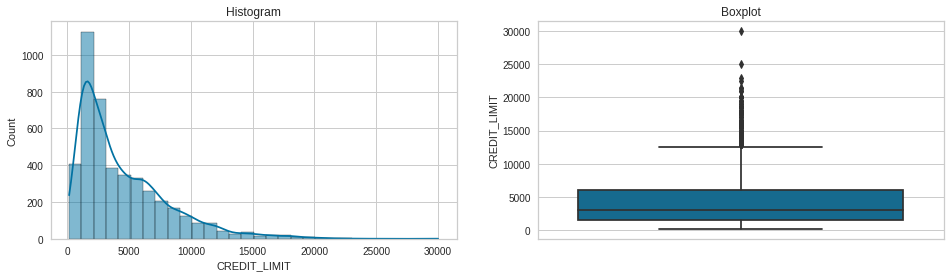

Measurement Scale : count     4474.000000
mean      4494.020175
std       3668.535689
min        150.000000
25%       1500.000000
50%       3000.000000
75%       6000.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64
Mode : 0    3000.0
Name: CREDIT_LIMIT, dtype: float64
Skew : 1.5450779677462632


In [12]:
# Check using function
diagnostic_plots1(df['CREDIT_LIMIT'])

In [13]:
# Check boundaries outliers using 3 * IQR, eextrim
find_skewed_boundaries(df,'CREDIT_LIMIT',3)

Total data : 4475
Total outliers : 14

% Outliers: 0.3128491620111732


(19500.0, -12000.0)

Diketahui untuk column credit limit terdapat outliers dengan menggunakan batas nilai ekstrim 3 x IQR diketahui batas atasnya adalah 19.500, dan ada 14 data atau 0.31% dari keseluruhan data.

## Check column PURCHASES_TRX

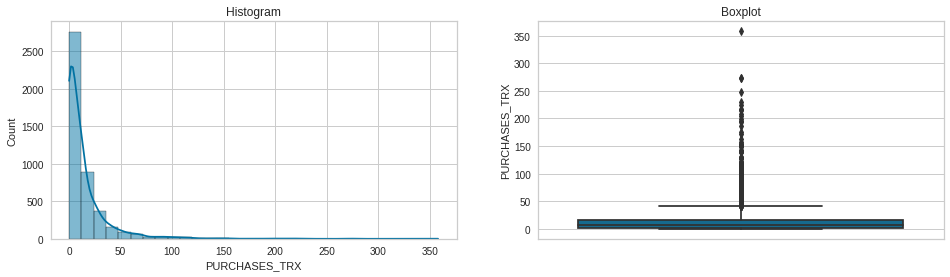

Measurement Scale : count    4475.000000
mean       14.490503
std        24.156038
min         0.000000
25%         1.000000
50%         7.000000
75%        17.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64
Mode : 0    0
Name: PURCHASES_TRX, dtype: int64
Skew : 4.480452469147952


In [14]:
# Check using function
diagnostic_plots1(df['PURCHASES_TRX'])

In [15]:
# Check boundaries outliers using 3 * IQR, eextrim
find_skewed_boundaries(df,'PURCHASES_TRX',3)

Total data : 4475
Total outliers : 167

% Outliers: 3.7318435754189943


(65.0, -47.0)

Diketahui dari hasil pemeriksaan column purchases trx, outliers dengan batas ekstrim mencapai 3.7% dari keseluruhan data. 

In [16]:
df[df['PURCHASES_TRX']>=65].sort_values(by='PURCHASES_TRX', ascending = False)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
718,3570,4010.621974,1.0,40040.71,24543.52,15497.19,0.000000,1.0,1.000000,1.000000,0.000000,0,358,18000.0,33994.727850,703.503256,1.000000,12
806,4590,2901.999862,1.0,11250.65,10165.88,1084.77,0.000000,1.0,1.000000,0.750000,0.000000,0,274,9500.0,6443.381719,691.328423,0.083333,12
1020,7066,5292.905315,1.0,5539.68,2603.79,2935.89,0.000000,1.0,0.916667,1.000000,0.000000,0,273,6000.0,3597.677582,3838.484817,0.000000,12
720,3592,975.416023,1.0,9586.10,7916.74,1669.36,0.000000,1.0,1.000000,1.000000,0.000000,0,248,12000.0,8906.373361,214.210554,0.916667,12
955,6304,681.615445,1.0,4117.24,290.00,3827.24,0.000000,1.0,0.166667,1.000000,0.000000,0,229,6000.0,4561.589382,199.730537,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2052,4005.344926,1.0,9134.26,2002.90,7131.36,0.000000,1.0,0.250000,1.000000,0.000000,0,65,10500.0,3579.298838,1148.902535,0.000000,12
476,916,449.456201,1.0,3597.02,2833.13,763.89,0.000000,1.0,1.000000,1.000000,0.000000,0,65,2000.0,3901.786339,177.540560,0.250000,12
478,924,206.376314,1.0,1886.21,1230.31,655.90,0.000000,1.0,1.000000,1.000000,0.000000,0,65,3000.0,2089.598011,170.955794,0.083333,12
3233,5004,3892.223260,1.0,929.99,453.00,476.99,558.732109,1.0,0.500000,1.000000,0.083333,1,65,6500.0,951.737085,909.741196,0.000000,12


Berdasarkan pengamatan terkait data diatas batas outliers, jenis outliersnya bukan karena kesalahan input. namun columns memang secara natural bisa terjadi. Bisa dilihat dari transaksi terbanyak, jumlah nominal belanjanya mencapai 40.000 usd, kemudian pembayaranny full payment, sehingga masih thap wajar frequency pembeliannya banyak.

## Pairplot over all

In [17]:
# Check keseluruhan columns menggunakan pairplot
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

Berdasarkan pengamatan column dataset menggunakan pairplot, dapat diketahui sebagai berikut:
1. Tenur terbanyak adalah 12 bulan.
2. Dari kolom full payment, diketahui mayoritas pembayarannya tidak penuh.
3. Dari kolom CASH_ADVANCE_TRX paling banyak di rentang 1 sampai 25 kali pengambilan dan dengan credit limit dibawah 10.000.
4. Dari kolom balance terlihat mayoritas dibawah 5.000, dan bila dihubungkan dengan limit kartu kreditnya, menunjukan customer kartu umumnya sudah menggunakan dan kurang dari setengah limit kartu kredit. 

# VI. Feature Engineering

## Define Features (X)

Berdasarkan objective membuat clustering terkait segmentasi berdasarkan limit kartu kredit dan jumlah pembelian, maka yang dijadikan Features x hanya PURCHASES_TRX & CREDIT_LIMIT

In [18]:
# Define X
x = df.loc[:, ['PURCHASES_TRX', 'CREDIT_LIMIT']]
x

,PURCHASES_TRX,CREDIT_LIMIT
0,2,1200.0
1,1,1000.0
2,1,1500.0
3,1,1000.0
4,1,1500.0
...,...,...
4470,0,1200.0
4471,0,4150.0
4472,20,10100.0
4473,25,6000.0


## Handling Missing Values

In [19]:
# Check missing values di features
x.isnull().sum()

PURCHASES_TRX    0
CREDIT_LIMIT     1
dtype: int64

Terlihat ada 1 di kolom credit limit yang missing values

In [20]:
# check the detail  
df[df['CREDIT_LIMIT'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3843,4956,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [21]:
# check the detail  
x[x['CREDIT_LIMIT'].isna()]



,PURCHASES_TRX,CREDIT_LIMIT
3843,0,NaN


Dari pengecekan nilai column lain di baris ini, missing disini dapat dilakukan imputasi dari nilai kolom lain. Dapat menggunakan hubungan antara colum balance dan cash advance. credit limit penjumlahan dari dua column tersebut. 

In [22]:
# imputation missing values
x['CREDIT_LIMIT'].fillna(200, inplace=True)

In [23]:
# recheck missing vlues
x.isnull().sum()

PURCHASES_TRX    0
CREDIT_LIMIT     0
dtype: int64

Sudah tidak ada missing values

## Handling outliers Features

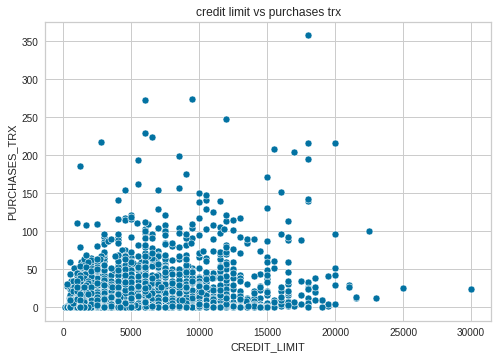

In [24]:
# Diagram scatterplot credit limit vs puchases trx
sns.scatterplot(data=df,x='CREDIT_LIMIT', y='PURCHASES_TRX')
plt.title('credit limit vs purchases trx');

Dilihat dari diagram scatter plot, terlihat adanya outliers yang jauh dari titik titik data lainnya.

Berdasarkan pengamatan di EDA untuk outliers di kolom purchases trx, adalah diatas 65 kali transaksi. Namun saat pengecekan mendetail, diketahui dari yang paling banyak transaksinya yaitu 350 trx, pembayarannya full payment = 1, dan colum lain juga menunjukan besaran nilai payment, dll. Secara tehnisnya hal ini mungkin karena pengguna tersebut menggunakan kartu kreditnya sebagai pembayaran untuk semua transaksi kesehariannya. Dan ketika sudah ada keluar tagihan dia langsung membayar full. 

Dengan kondisi seperti ini, outliers tidak bisa dihapus karena bukan kesalahan input system.

## Features scaling

Untuk perbandingan jumlah frekuensi(satuan) dan jumlah limit credit(ribuan) memiliki perbedaan nilai yang jauh, sehingga diperlukan standarisasi atau scaling. Dikarenakan dalam features ini terdapat outliers yang tidak bisa dibuang, maka digunakan stndarisasi menggunakan robust scaller.

In [84]:
# Scaling using robust scaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

In [58]:
x_scaled

array([[-0.3125    , -0.4       ],
       [-0.375     , -0.44444444],
       [-0.375     , -0.33333333],
       ...,
       [ 0.8125    ,  1.57777778],
       [ 1.125     ,  0.66666667],
       [ 0.625     ,  0.22222222]])

## Reduce Dimension Features (PCA)

Untuk mendapati hasil performa yang baik, dilakukan proses decompos atau pengurangan dimensi dengan PCA.

In [70]:
# Define PCA and fit target 
pca= PCA()
x_pca= pca.fit_transform(x_scaled)

In [71]:
x_pca

array([[-0.9143644 , -0.5557703 ],
       [-0.98466305, -0.58642415],
       [-0.96183239, -0.47768391],
       ...,
       [ 0.59301628,  1.14864556],
       [ 0.7116368 ,  0.19276435],
       [ 0.13098308, -0.13945864]])

# VII. Model Definition
Pada bagian ini melakukan definisi model machine learning dengan algoritma K Means dengan default setting. Pada algoritma K means harus dilakukan definisi jumlah cluster. Pada default jumlah clusternya ada 8.

Setelah menggunakan default dilakukan juga evaluasi jumlah cluster atau K dengan menggunakan Elbow method dan Silouete score.

In [27]:
# K Means
km_model = KMeans(n_init='auto', random_state=19)

# VIII. Model Training

Untuk training algoritma K Means haru dengan data array, tidak bisa menggunakan data yang sudah dalam bentuk dataframe dengan ada kolom.

In [28]:
# Fit features
km_model.fit(x_pca)

KMeans(n_init='auto', random_state=19)

# IX. Model Evaluation



In [29]:
# Predict features Default parameter
clusters= km_model.predict(x_pca)

In [30]:
# Create dataframe 
x_cluster= pd.DataFrame(x_pca, columns= ['P_TRX',	'C_L'])
x_cluster.head()

,P_TRX,C_L
0,-0.914364,-0.555770
1,-0.984663,-0.586424
2,-0.961832,-0.477684
3,-0.984663,-0.586424
4,-0.961832,-0.477684


In [31]:
# Creat new column as result from predict
x_cluster['clusters']= clusters
x_cluster.head()

,P_TRX,C_L,clusters
0,-0.914364,-0.555770,3
1,-0.984663,-0.586424,3
2,-0.961832,-0.477684,3
3,-0.984663,-0.586424,3
4,-0.961832,-0.477684,3


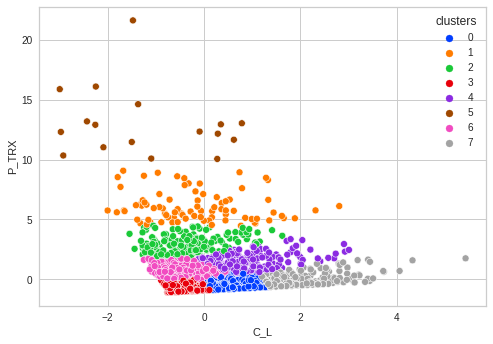

In [33]:
# Visualize clustering k= 8 (default)
sns.scatterplot(data=x_cluster, x='C_L', y='P_TRX', hue="clusters",palette="bright");

## Elbow method

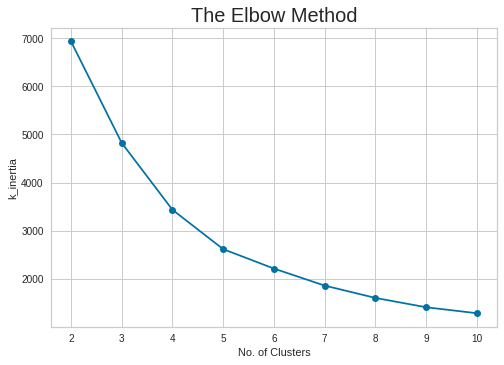

In [34]:
k_inertia = []
mapping = {}
# finding the best k 2-10
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 19)
    km.fit(x_pca)
    k_inertia.append(km.inertia_)
    mapping[i] = km.inertia_

    
plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

In [35]:
for key, val in mapping.items():
    print(f'{key} : {val}')

2 : 6933.420627295874
3 : 4822.844741932393
4 : 3433.1335571160994
5 : 2614.779912336339
6 : 2210.981368495707
7 : 1856.931382122033
8 : 1600.9716304902902
9 : 1406.5387247902459
10 : 1282.679522893502


Terlihat dari diagram elbow dan nilai inertia yang setelahnya tidak turun signifikan pada k = 5 . Sehingga cluster yang dipilih adalah 5.

## Silhouette Score

In [36]:
from sklearn.metrics import silhouette_score

#calculate the score
score = silhouette_score(x_pca, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.414


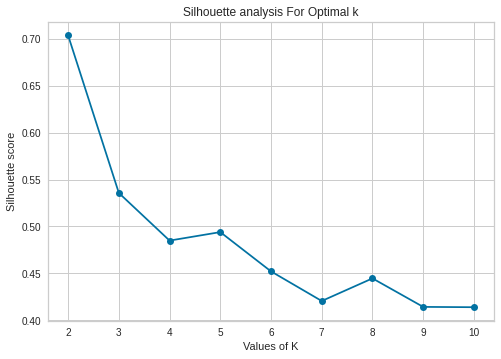

In [37]:
# Visualize shiloute score for the best K
silhouette_avg = []
for k in range(2,11):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 19)
  km.fit(x_pca)
  cluster_labels = km.labels_
 # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels, metric='euclidean'))

plt.plot(range(2,11),silhouette_avg, marker ="o")
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

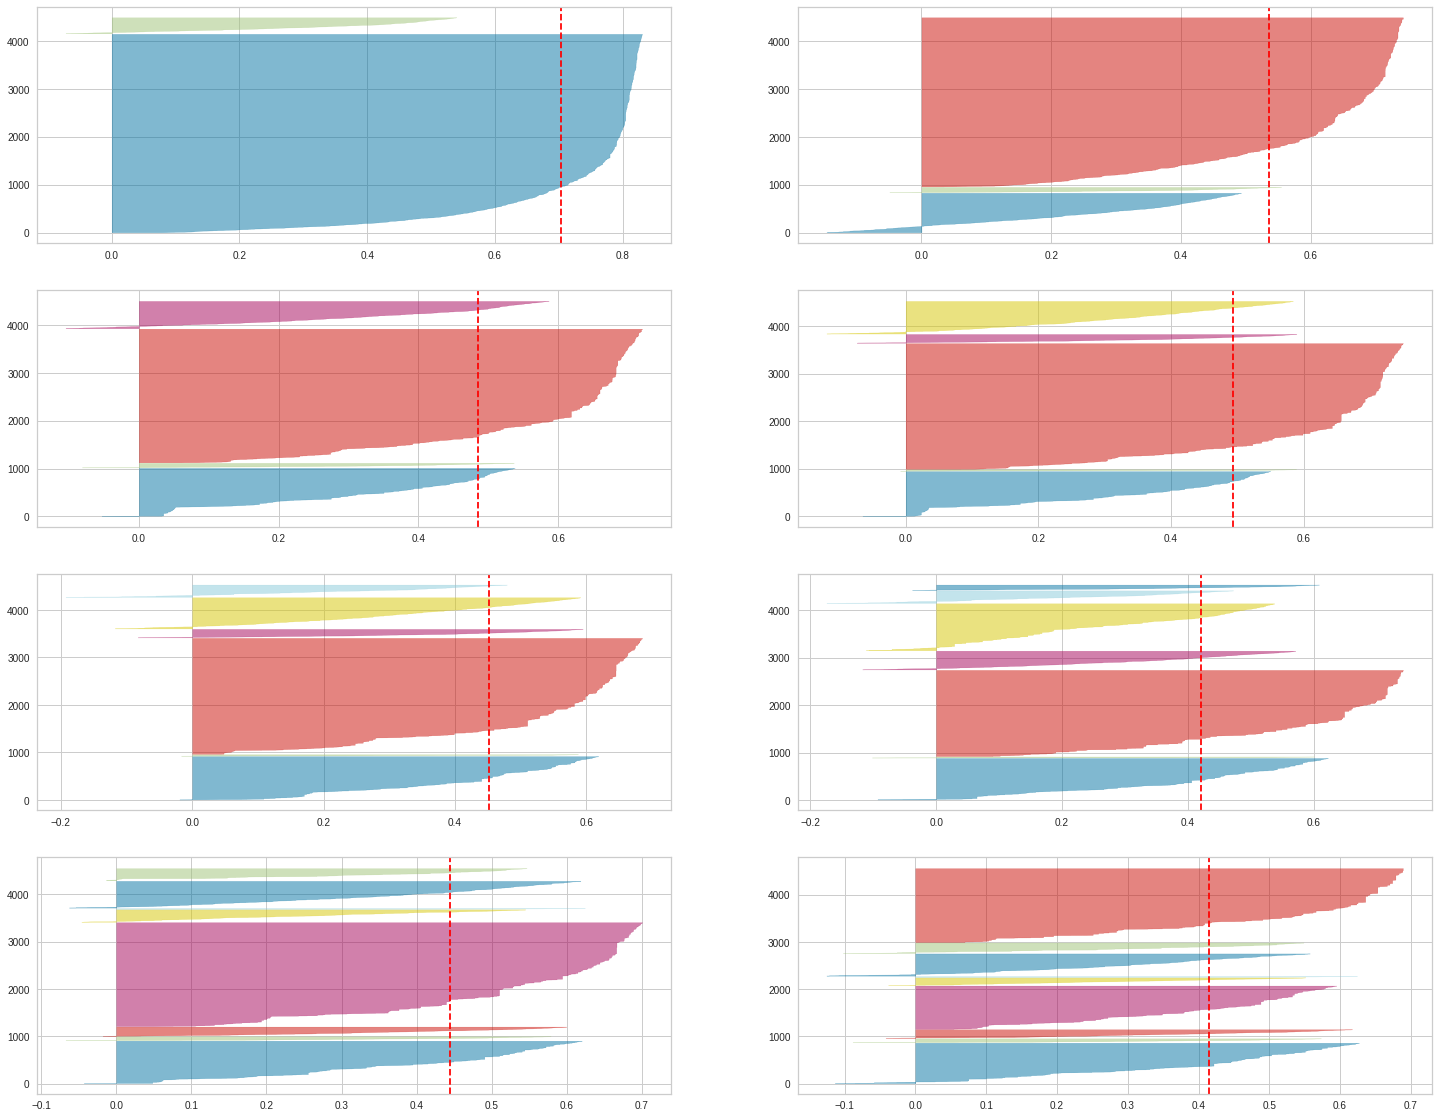

In [38]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize = (25,20))
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, init="k-means++", n_init = 'auto', max_iter = 300, random_state = 19)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod], metric='euclidean')
  visualizer.fit(x_pca)

Dari nilai shilouete score juga terlihat pada k = 5 merupakan nilai shilouete tertinggi ke 3. Bila dibandingkan dengan tertingi ke 1 dan ke 2 dari visualisasinya sangat tidak balance, sehingga tidak akan baik dalam mengclusterkan data. Berdasarkan itu maka yang tetap dipilih adalah k = 5

## Clustering using k from elbow and shilouete score 
Melakukan clustering dengan k = 5

In [53]:
# Define KN Means K=5 and fit to x_pca
km_final= KMeans(n_clusters=5, init="k-means++", n_init='auto',max_iter=300, random_state=19)
km_final.fit(x_pca)

KMeans(n_clusters=5, n_init='auto', random_state=19)

In [46]:
# Predit to features (x_pca)
clusters_final = km_final.predict(x_pca)

In [77]:
clusters_final

array([2, 2, 2, ..., 0, 4, 2], dtype=int32)

In [47]:
# Create dataframe
final_cluster= pd.DataFrame(x_pca, columns= ['P_TRX',	'C_L'])

In [48]:
# Create new column cluster as predict result 
final_cluster['clusters']= clusters_final
final_cluster.head()

,P_TRX,C_L,clusters
0,-0.914364,-0.555770,2
1,-0.984663,-0.586424,2
2,-0.961832,-0.477684,2
3,-0.984663,-0.586424,2
4,-0.961832,-0.477684,2


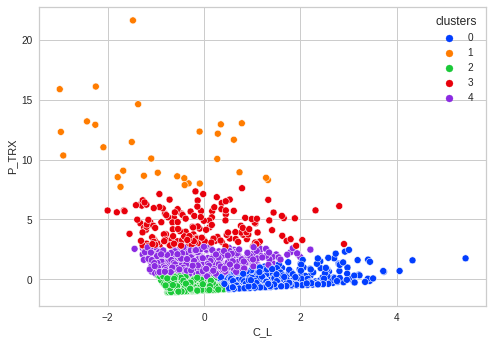

In [49]:
# Visualize the result from PCA Features
sns.scatterplot(data=final_cluster, x='C_L', y='P_TRX', hue="clusters",palette="bright");

In [50]:
# Concate to origin dataframe before split features
df_cluster = pd.concat([df,final_cluster], axis = 1)
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,P_TRX,C_L,clusters
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,...,0,2,1200.0,0.000000,NaN,0.0,8,-0.914364,-0.555770,2
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,...,0,1,1000.0,215.325023,410.484825,0.0,8,-0.984663,-0.586424,2
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,...,0,1,1500.0,0.000000,NaN,0.0,8,-0.961832,-0.477684,2
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,...,0,1,1000.0,258.032630,151.696433,0.0,8,-0.984663,-0.586424,2
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,...,0,1,1500.0,397.090516,227.143184,0.0,8,-0.961832,-0.477684,2


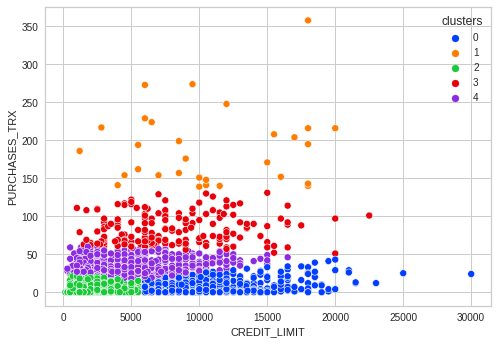

In [52]:
# Visualize dataframe origine with clustering from model
sns.scatterplot(data=df_cluster, x='CREDIT_LIMIT', y='PURCHASES_TRX', hue="clusters",palette="bright");

## Pembahasan model evaluation 

Dari bagian model evaluation didapatkan 2 hasil model machine learning K Means clustering. Model pertama adalah clustering dengan default, yaitu 8 clustering. Dari pengamatan dengan clustering sebanyak 8 terlalu banyak dan dapat dibilang tumpang tindih apabila disegmentasikan ke dalam perilaku customer cartu credit.

Dan berdasarkan elbow methode diketahui pada K ke 5 nilai inertianya tidak signifkan jauh dengan dibawahnya. Berarti diatas 5 clustering sudah tidak memiliki pengaruh besar pergeseran clustering. 

Dari nilai silouete, K=5 merupakan tertinggi ke 3, untuk tertinggi ke 1 dan ke 2 sangat tidak sebanding besar lebar dari kelompoknya. sehingga yang dipilih adalah yang ke 3, namun gap antar lebar cluster tidak terlalu jauh.

Berikut penjabaran cluster dari hasil cluster berdasarkan Elbow method dan Siloute score:
* 0 = Cluster untuk customer dengan limit besar namun pembelanjaannya sedikit
* 1 = Cluster untuk customer yang memiliki pembelanjaan sangat banyak dari semua limit
* 2 = Cluster untuk customer dengan limit kecil dan belanjanya juga sedikit
* 3 = Cluster untuk customer dengan pembalanjaan banyak dari semua limit
* 4 = Cluster untuk customer dengan pembelanjaan sedang dari semua limit.



## Conceptual problems

1. Inertia adalah nilai penjumlahan kuadrat dari jarak semua titik data ke centroidnya dalam sebuah cluster. Semakin kecil semakin baik. titik2 datanya semakin dekat ke centroidnya.

2. Elbow method adalah tehnik mencari jumlah cluster (K) yang terbaik berdasarkan nilai distorsi atau nilai inertia nya. K yang terbaik adalah K dengan siginifikansi setelahnya rendah atau tidak signifikan. 

  Dengan k yang signifikansi setelahnya rendah berarti dengan menambahkan jumlah K clusternya tidak memberikan pengaruh yang baik terhadap model. tidak memiliki pengaruh signifikan, sehingga tidak perlu menambah jumlah clusternya. 

  Kelemahannya adalah ketika grafik elbownya tidak terlihat jelas, sehingga tidak bisa menentukan titik k yang terbaik untuk dijadikan titik elbos.

# X. Saving Model

In [85]:
# Save the Files

import pickle

with open('km_final.pkl', 'wb') as file_1:
  pickle.dump(km_final, file_1)


with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)



Untuk saving hanya model dan scaler saja, karena pada dataframe ini hanya menggunakan numerik.

# XI. Inference

## Load saved modeling

In [86]:
# Load All Files

with open('km_final.pkl', 'rb') as file_1:
  km_final = pickle.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = pickle.load(file_2)

## Create Inference Data

In [90]:
# Create New Data

data_inf = {
    'PURCHASES_TRX': 10,
    'CREDIT_LIMIT': 15000,
    }

data_inf = pd.DataFrame([data_inf])
data_inf

,PURCHASES_TRX,CREDIT_LIMIT
0,10,15000


## Scaling

In [91]:
# Feature Scaling and Feature Encoding

data_inf_scaled = scaler.transform(data_inf)
data_inf_scaled 


array([[0.1875    , 2.66666667]])

## Clustering Inference Data

In [92]:
# Predict inference using Linear Regression 

cluster_inf = km_final.predict(data_inf_scaled)
cluster_inf

array([0], dtype=int32)

Dari hasil clustering customer dengan limit 15.000 usd dan pembelanjaan hanya 10 kali maka termasuk cluster 0, yaitu high limit and low purchases. Sudah sesuai dengan clusteringnya.  

# XII. Conclusion

Diketahui dari proses EDA credit limit terbanyak adalah limit dalam rentang 150 - 3.000 usd, dengan persentasi 50 %. Dari jumlah pembayaran secara full payment mayoritas tidak dengan pembayaran full payment, untuk tenor pembayarannya mayoritas yang 12 bulan. Sedangkan untuk jumlah barang yang dibeli, 50% data dalam rentang kurang dari 10 kali belanja. 

Secara keseluruhan untuk distribusi datanya tidak normal, cukup miring dan sangat miring. Berdasarkan pengamatan menggunakan scatter plot terlihat adanya titik data yang pencilan atau ouliers, namun saat dilihat secara mendetail outliersnya adalah natural.

Dengan memperhatikan nilai colum lainnya juga mengalami penyesuaian, misal untuk yang kolom banyaknya transaksi pembelian outlier, saat dilihat nilai purchasesnya juga tinggi, dan paymentnya juga tinggi. Menandakan hal ini bukan kesalahan input sehingga tidak bisa dibuang.

Berdasarkan objective diawal yang ingin mengamati segmentasi berdasarkan purchases trx dengan limit credit maka yang difokuskan kesana. Untuk outliers lain diabaikan. Sementara untuk untuk outliers dari kedua column ini dianggap natural.

Pada Feature engineering dilakukan deklarasi fitur (x) dengan dua kolomn tersebut, kemudian untuk mengatasi natural outliers dilakukan scaling dengan robust scaler dan setelahnya dilakukan pengurangan dimensi dengan PCA agar bisa lebih baik dalam clusteringnya.

Dari hasil evaluasi model dengan algoritma K Means, diketahui jumlah cluster atau K yang terbaik adalah 5 berdasarkan elbow methode dan silouete score. Untuk elbow method, setelah k= 5 nilai pengurangan inertia hanya sekitar 400-200 saja, beda jauh selisih nilai inertia saat k = 4 ke k = 5. Begitupun dengan siloute score, nilai k = 5 merupakan terbaik ke 3, namun dengan lebar cluster tidak terlalu jompang dibanding 2 K terbaik sebelumnya. 

Berdasarkan hal tersebut pembagian cluster dibagi menjadi 5 cluster dengan penjelasan yang sudah dijabarkan di bagian model evaluasi. Dengan mengetahui segmentasi dari customer dengan pengelompokan tersebut, perusahaan bisa melakukan beberapa strategi seperti:

Untuk cluster 0, perusahaan bisa memberikan promo barang berkualitas dan menarik dengan pembayaran bisa dicicil. Segmentasi ini adalah orang yang memiliki uang lebih namun tidak bersikap konsumtif, sehingga perlu dorongan agar mau menggunakan.

Untuk cluster 1, Perusahaan tidak perlu melakukan penawaran atau promo namun yang harus diperhatikan adalah kemungkinan gagal bayar, karena pembeliannya sangat banyak dari semua rentang limit credit. Segmentasi kelompok ini kemungkinan adalah customer yang ingin memaksimalkan penggunaan limitnya.

Untuk cluster 2, perusahaan bisa menawarkan promo produk diskon agar memancing customernya berbelanja. kelompok  ini merupakan customer dengan penghasilan menengah kebawah dan selektif dalam berbelanja. kemungkinan besar sangat memperhatikan adanya diskon dan promo installment.

Untuk Cluster 3, perlakuannya mirip dengan cluster 1, perusahaan mungkin bisa memaintain dengan cara memberikan poin agar customernya tetap mempertahankan penggunanaan dan tidak pindah ke perusahaan lain.

Untuk cluster 4 dengan segment customer yang pembelanjaannya menengah bisa ditawarkan produk2 yang bisa dilakukan installment dan diskonan, serta kesempatan untuk menambah limit agar semakin banyak belanja.


Saran untuk perbaikan ke depannya perlu dilakukan perbandingan dengan menggunakan algoritma clustering lainnya yang bisa memisahkan outliers dengan baik seperti DBscan. Kemudian juga dilakukan perbandingan antara hard dan soft clustering. 